In [61]:
import pandas as pd
import numpy as np
import seaborn as sns

In [26]:
df=pd.read_csv('/Users/sunnyli/Desktop/sales_data.csv')

In [27]:
df

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...
1045,Product_45,Region_7,78.69,8.0,2022-07-28
1046,Product_1,Region_6,NaN,8.0,2022-08-02
1047,Product_17,Region_2,114.37,11.0,2023-12-18
1048,NaN,Region_8,NaN,5.0,2023-12-27


In [28]:
df.info

<bound method DataFrame.info of          Product    Region   Price  Units Sold   Sale Date
0            NaN  Region_6   75.96        10.0  2022-01-01
1            NaN  Region_1  175.78         8.0  2022-01-02
2     Product_46  Region_3   20.43        12.0  2022-01-03
3     Product_36  Region_1   12.77        10.0  2022-01-04
4     Product_17  Region_6  125.69         6.0  2022-01-05
...          ...       ...     ...         ...         ...
1045  Product_45  Region_7   78.69         8.0  2022-07-28
1046   Product_1  Region_6     NaN         8.0  2022-08-02
1047  Product_17  Region_2  114.37        11.0  2023-12-18
1048         NaN  Region_8     NaN         5.0  2023-12-27
1049  Product_16  Region_2   69.30         8.0  2024-02-23

[1050 rows x 5 columns]>

In [29]:
df.dtypes

Product        object
Region         object
Price         float64
Units Sold    float64
Sale Date      object
dtype: object

As each column contains the nan value, I am considering whether delete or change the name for the object column.
For the column with floats, i can filling the missing value with the mean value to make the dataset more accurate.

In [31]:
df.describe(include='all')


,Product,Region,Price,Units Sold,Sale Date
count,947,946,945.000000,946.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_45,Region_9,NaN,NaN,2022-07-28
freq,28,109,NaN,NaN,2
mean,NaN,NaN,107.598688,10.048626,NaN
std,NaN,NaN,124.020322,3.172261,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.430000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,142.570000,12.000000,NaN


I decided to filling the missing value in column price and units sold with mean value. Since it can directly see in the chart above. Then, I can use same code to doublecheck the count, mean has been changed after cleaning.

In [32]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


<Axes: xlabel='Price', ylabel='Count'>

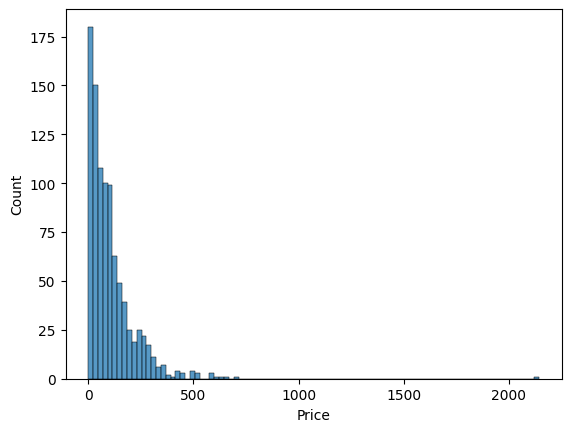

In [33]:
sns.histplot(df['Price'])

I think the outlier of price will affect my analysis, but the outlier of Units sold is acceptable.
Histplot is very clear and direct help me to see the price outlier. Since it is too far away from the other data, I decided to delete which lead in more accruate dataset.

In [34]:
df[df['Price']>2000]

,Product,Region,Price,Units Sold,Sale Date
969,Product_15,Region_8,2143.3,5.0,2024-08-27


In the histplot, the outlier is located over 2000. Thus, sort the price that is over 2000. the infomation of this outlier comes out. 

In [35]:
df.drop(969,axis=0,inplace=True)

Now,it is clear that the outlier is product_15 in Region_8 priced 2143.3 in row 969. use inplace=true to delete permanently, otherwise it will not be saved in the df.

<Axes: >

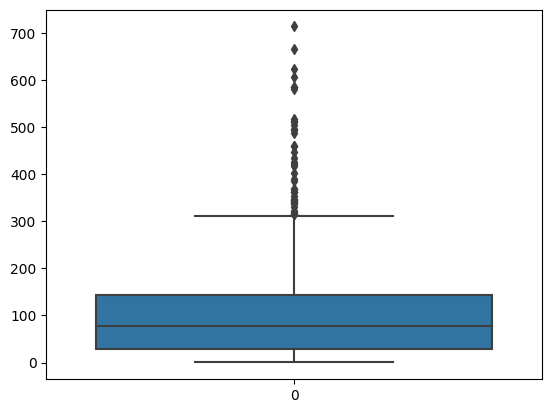

In [36]:
sns.boxplot(df['Price'])

<Axes: xlabel='Price', ylabel='Count'>

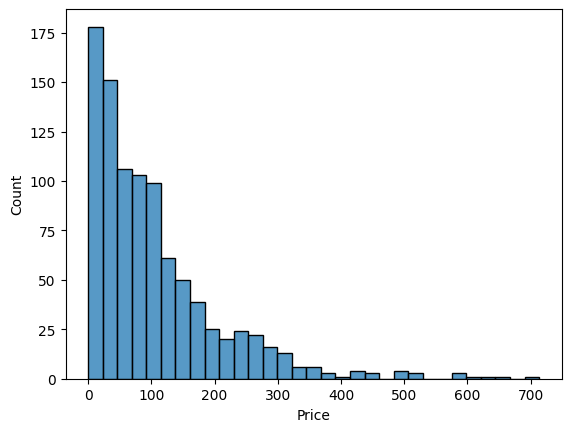

In [37]:
sns.histplot(df['Price'])

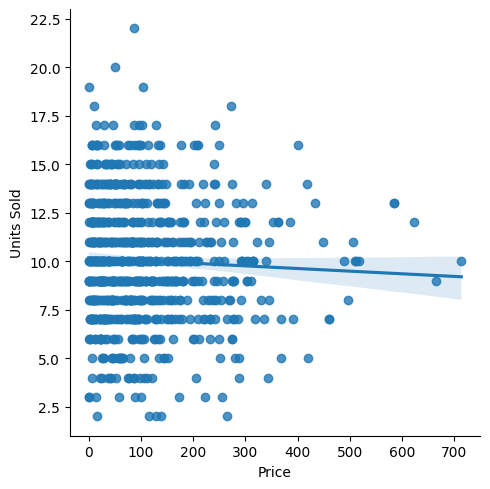

In [38]:
sns.lmplot(data=df, x='Price', y='Units Sold',fit_reg =True)

Then, I used histplot and boxplot again to doublecheck the outlier has been removed. Also, there is no more outlier need to be drop.

In [39]:
df

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...
1045,Product_45,Region_7,78.69,8.0,2022-07-28
1046,Product_1,Region_6,NaN,8.0,2022-08-02
1047,Product_17,Region_2,114.37,11.0,2023-12-18
1048,NaN,Region_8,NaN,5.0,2023-12-27


Use df to see that there is 1049 rows now due to the drop of one row with outlier.

In [40]:
df.drop_duplicates(inplace=True)

The duplicates in this model is not meaningful and I think those duplicates might be enter errors. Thus, i decided to drop it permanently to get more accurate data.

In [136]:
df

,Product,Region,Price,Units Sold,Sale Date,Total Sales
2,Product_46,Region_3,20.43,12.000000,2022-01-03,245.16000
3,Product_36,Region_1,12.77,10.000000,2022-01-04,127.70000
4,Product_17,Region_6,125.69,6.000000,2022-01-05,754.14000
5,Product_45,Region_1,8.63,11.000000,2022-01-06,94.93000
6,Product_31,Region_3,23.73,6.000000,2022-01-07,142.38000
...,...,...,...,...,...,...
988,Product_42,Region_9,240.97,10.073415,2024-09-15,2427.39079
993,Product_7,Region_9,128.51,17.000000,2024-09-20,2184.67000
994,Product_1,Region_4,95.24,7.000000,2024-09-21,666.68000
998,Product_2,Region_10,43.44,15.000000,2024-09-25,651.60000


Double check what's the new df looks like. There are only 809 rows left. And cleaning step is almost done.

In [137]:
df.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date,Total Sales
count,809,809,809.000000,809.000000,809,809.000000
unique,50,10,NaN,NaN,809,NaN
top,Product_5,Region_9,NaN,NaN,2022-01-03,NaN
freq,28,96,NaN,NaN,1,NaN
mean,NaN,NaN,104.135957,10.107293,NaN,1039.491181
std,NaN,NaN,99.140657,3.064107,NaN,1053.760396
min,NaN,NaN,0.200000,2.000000,NaN,0.990000
25%,NaN,NaN,33.790000,8.000000,NaN,296.050000
50%,NaN,NaN,87.660000,10.000000,NaN,798.830000
75%,NaN,NaN,129.130000,12.000000,NaN,1370.200000


In [43]:
df['Price']=df['Price'].fillna(df['Price'].mean())

After deleting the object missing value, i am going to deal with the float type missing value.
As i can clearly see the change of mean in the chart above and it is reasonable to replace them with mean value.
I use fillna to flling the nan value in price coloum with the mean value.

In [44]:
df['Units Sold']=df['Units Sold'].fillna(df['Units Sold'].mean())

same as the code above, i used fillna to filling the nan value in units sold column with the mean value.

In [45]:
df.dropna(subset=['Product'],inplace=True)

Considering about the missing value in product coloum, the product is necessary to be compared by other variables.
Thus, change the nan value to other name like 'product_other' is not meaningful. I decided to delete the row not showing the product name permanently.

In [46]:
df.dropna(subset=['Region'],inplace=True)

Same as product coloum, Region is a significant variable that need to do analyze the sales performance. Delete the row with no Region value can make the dataset more organized.

In [47]:
df.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,809,809,809.000000,809.000000,809
unique,50,10,NaN,NaN,809
top,Product_5,Region_9,NaN,NaN,2022-01-03
freq,28,96,NaN,NaN,1
mean,NaN,NaN,104.135957,10.107293,NaN
std,NaN,NaN,99.140657,3.064107,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,33.790000,8.000000,NaN
50%,NaN,NaN,87.660000,10.000000,NaN
75%,NaN,NaN,129.130000,12.000000,NaN


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 809 entries, 2 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     809 non-null    object 
 1   Region      809 non-null    object 
 2   Price       809 non-null    float64
 3   Units Sold  809 non-null    float64
 4   Sale Date   809 non-null    object 
dtypes: float64(2), object(3)
memory usage: 37.9+ KB


This code is used to help me doublcheck there is no missing value. The cleaning step is done by now.

In [212]:
df['Total Sales']=df['Units Sold']*df['Price']
print(df)

        Product     Region   Price  Units Sold   Sale Date  Total Sales
2    Product_46   Region_3   20.43   12.000000  2022-01-03    245.16000
3    Product_36   Region_1   12.77   10.000000  2022-01-04    127.70000
4    Product_17   Region_6  125.69    6.000000  2022-01-05    754.14000
5    Product_45   Region_1    8.63   11.000000  2022-01-06     94.93000
6    Product_31   Region_3   23.73    6.000000  2022-01-07    142.38000
..          ...        ...     ...         ...         ...          ...
988  Product_42   Region_9  240.97   10.073415  2024-09-15   2427.39079
993   Product_7   Region_9  128.51   17.000000  2024-09-20   2184.67000
994   Product_1   Region_4   95.24    7.000000  2024-09-21    666.68000
998   Product_2  Region_10   43.44   15.000000  2024-09-25    651.60000
999  Product_35   Region_8   56.95    6.000000  2024-09-26    341.70000

[809 rows x 6 columns]


From my perspective, the column shows the total sales of each product is necessary to genrate the analysis. 
It will become more clear when use total sales to compared with product or region.

In [213]:
df.head(15)

,Product,Region,Price,Units Sold,Sale Date,Total Sales
2,Product_46,Region_3,20.430000,12.000000,2022-01-03,245.160000
3,Product_36,Region_1,12.770000,10.000000,2022-01-04,127.700000
4,Product_17,Region_6,125.690000,6.000000,2022-01-05,754.140000
5,Product_45,Region_1,8.630000,11.000000,2022-01-06,94.930000
6,Product_31,Region_3,23.730000,6.000000,2022-01-07,142.380000
7,Product_18,Region_7,19.270000,9.000000,2022-01-08,173.430000
8,Product_16,Region_9,30.700000,14.000000,2022-01-09,429.800000
9,Product_9,Region_2,264.050000,7.000000,2022-01-10,1848.350000
10,Product_20,Region_3,104.189399,8.000000,2022-01-11,833.515195
11,Product_1,Region_4,63.040000,9.000000,2022-01-12,567.360000


Different between units sold is not large.
there's huge difference between price of each product.

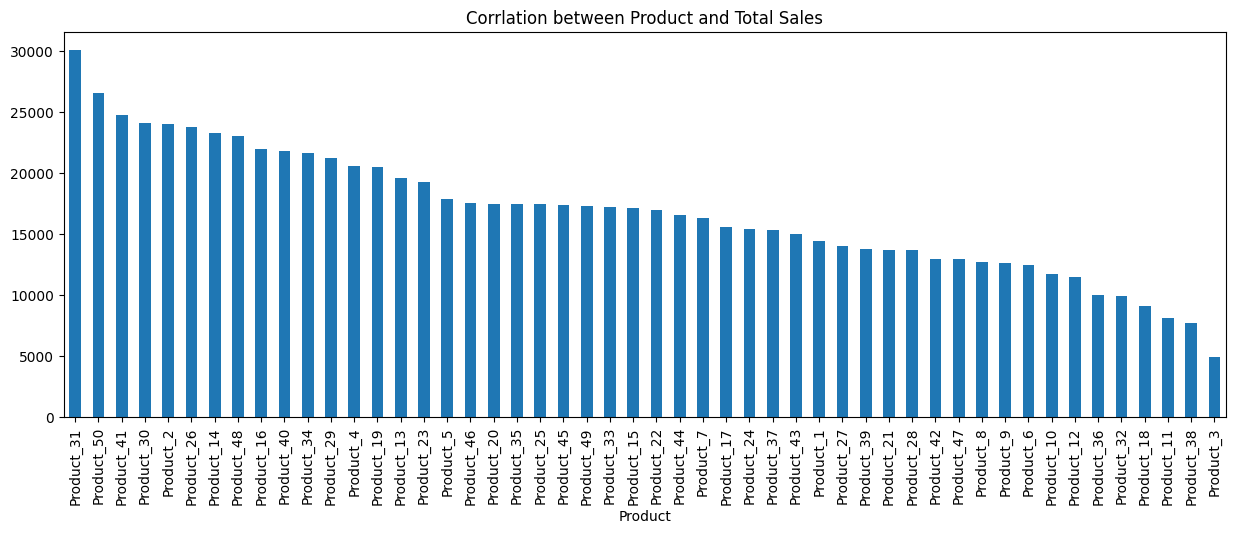

In [214]:
plt.figure(figsize=(15,5))
Corrlation_between_Product_and_Total_Sales=df.groupby('Product')['Total Sales'].sum().sort_values(ascending=False)
Corrlation_between_Product_and_Total_Sales.plot(kind='bar')
plt.x=('Product')
plt.y=('Total Sales')
plt.title('Corrlation between Product and Total Sales')
plt.show()

In [199]:
# highest price for each product
df.groupby('Product')['Price'].sum().sort_values(ascending=False)

Product
Product_31    3047.510000
Product_41    2517.628799
Product_40    2478.880000
Product_19    2366.068799
Product_50    2356.348198
Product_2     2339.718198
Product_30    2297.410000
Product_29    2234.439399
Product_26    2217.129399
Product_34    2186.678198
Product_13    2171.698198
Product_45    2149.790000
Product_5     2070.589399
Product_48    2017.830000
Product_14    1951.109399
Product_4     1946.777597
Product_16    1875.529399
Product_25    1874.250000
Product_49    1871.690000
Product_33    1858.168799
Product_35    1821.098198
Product_23    1799.979399
Product_46    1771.708198
Product_44    1768.847597
Product_17    1750.799399
Product_22    1685.408198
Product_24    1626.268799
Product_20    1605.448198
Product_39    1591.130000
Product_15    1563.027597
Product_37    1562.359399
Product_1     1534.698198
Product_43    1482.258198
Product_47    1454.299399
Product_7     1421.898198
Product_42    1394.138198
Product_21    1334.000000
Product_6     1320.148799
Prod

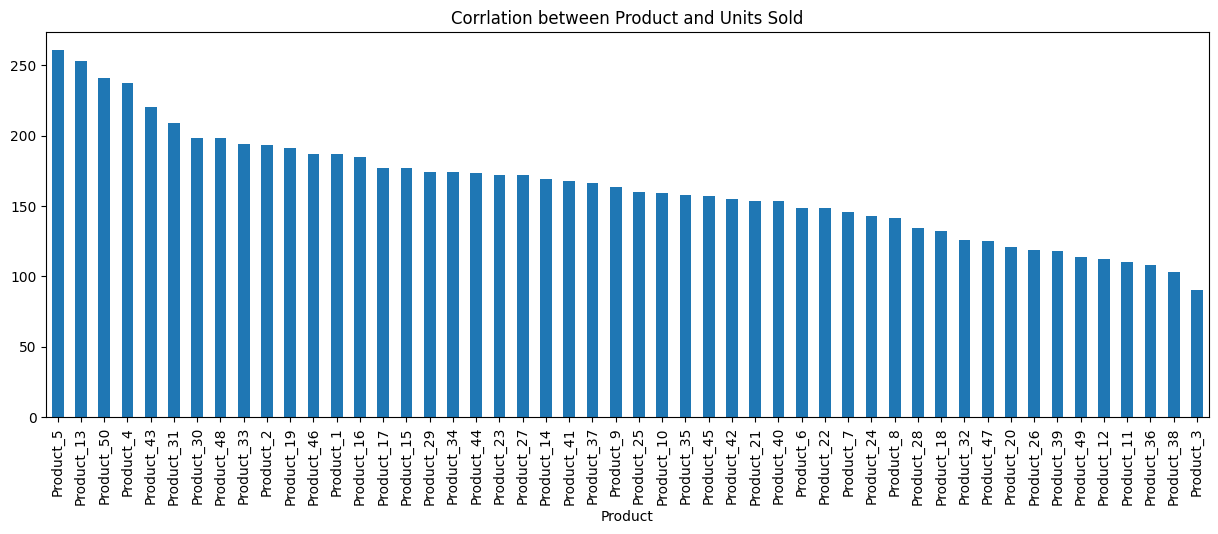

In [174]:
plt.figure(figsize=(15,5))
Corrlation_between_Product_and_Units_Sold=df.groupby('Product')['Units Sold'].sum().sort_values(ascending=False)
Corrlation_between_Product_and_Units_Sold.plot(kind='bar')
plt.x=('Product')
plt.y=('Units Sold')
plt.title('Corrlation between Product and Units Sold')
plt.show()

In [166]:
# Units sold for each product
df.groupby('Product')['Units Sold'].sum().sort_values(ascending=False)

Product
Product_5     260.440489
Product_13    253.146830
Product_50    241.146830
Product_4     237.073415
Product_43    220.073415
Product_31    209.000000
Product_30    198.367075
Product_48    198.000000
Product_33    194.073415
Product_2     193.146830
Product_19    191.000000
Product_46    187.073415
Product_1     187.000000
Product_16    185.000000
Product_17    177.073415
Product_15    177.073415
Product_29    174.220245
Product_34    174.073415
Product_44    173.220245
Product_23    172.146830
Product_27    172.146830
Product_14    169.146830
Product_41    168.000000
Product_37    166.073415
Product_9     163.146830
Product_25    160.073415
Product_10    159.073415
Product_35    158.073415
Product_45    157.367075
Product_42    155.220245
Product_21    153.220245
Product_40    153.146830
Product_6     148.220245
Product_22    148.220245
Product_7     146.000000
Product_24    143.073415
Product_8     141.146830
Product_28    134.073415
Product_18    132.146830
Product_32    126

In [198]:
df[df['Product'] == 'Product_3']

,Product,Region,Price,Units Sold,Sale Date,Total Sales
14,Product_3,Region_2,13.770000,17.0,2022-01-15,234.090000
53,Product_3,Region_6,0.540000,14.0,2022-02-23,7.560000
131,Product_3,Region_9,79.850000,11.0,2022-05-12,878.350000
225,Product_3,Region_2,97.210000,16.0,2022-08-14,1555.360000
243,Product_3,Region_9,104.189399,7.0,2022-09-01,729.325795
447,Product_3,Region_3,15.050000,3.0,2023-03-24,45.150000
640,Product_3,Region_8,18.670000,13.0,2023-10-03,242.710000
878,Product_3,Region_9,140.230000,9.0,2024-05-28,1262.070000


As it shows the worest performance, this chart can this all the informations correlate with Product_3

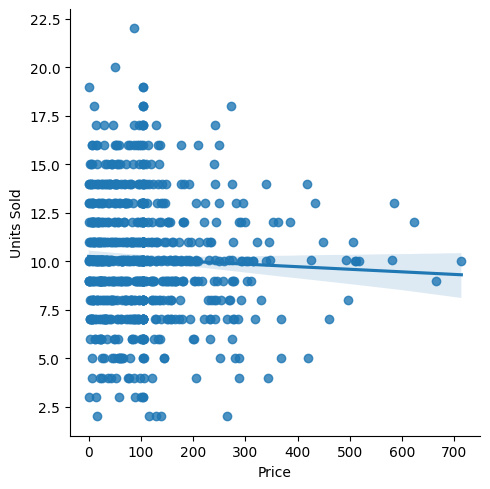

In [128]:
sns.lmplot(data=df, x='Price', y='Units Sold',fit_reg =True)

By using this lmplot, i want to see the linear regression to see the relationship between price and units sold.

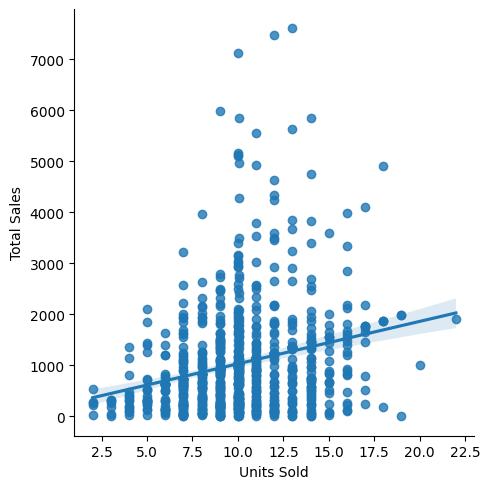

In [130]:
sns.lmplot(data=df, x='Units Sold', y='Total Sales',fit_reg =True)

fins out how the units sold relates to the total sales. 

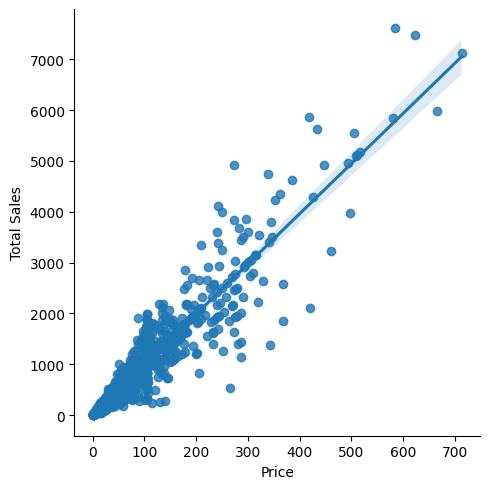

In [132]:
sns.lmplot(data=df, x='Price', y='Total Sales',fit_reg =True)

From this lmplot i want to see when price increase, how much sales would change. Compared with the lmplot above, i can tell that revenue is high when set the product with high price. the line here shows the sales will change significantly when the price increase.

In [51]:
# Region with highest sales
df.groupby('Region')['Units Sold'].sum().sort_values(ascending=False)

Region
Region_9     980.660734
Region_10    905.587319
Region_4     905.367075
Region_5     850.734149
Region_8     848.954394
Region_3     807.513904
Region_6     770.587319
Region_1     745.367075
Region_2     724.293660
Region_7     637.734149
Name: Units Sold, dtype: float64

I want to see the correlation between variable group by Region. region_9 has the highest units sold. region_7 has the lowest

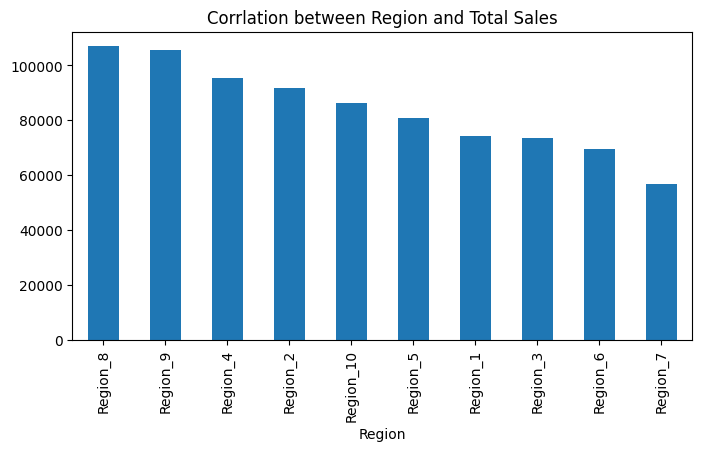

In [208]:
plt.figure(figsize=(8,4))
Corrlation_between_Region_and_Total_Sales=df.groupby('Region')[('Total Sales')].sum().sort_values(ascending=False)
Corrlation_between_Region_and_Total_Sales.plot(kind='bar')
plt.x=('Region')
plt.y=('Total Sales')
plt.title('Corrlation between Region and Total Sales')
plt.show()

In [210]:
df[df['Region'] == 'Region_8']

,Product,Region,Price,Units Sold,Sale Date,Total Sales
22,Product_14,Region_8,119.10,11.000000,2022-01-23,1310.100000
28,Product_27,Region_8,32.03,10.000000,2022-01-29,320.300000
29,Product_28,Region_8,217.65,9.000000,2022-01-30,1958.850000
37,Product_24,Region_8,49.10,5.000000,2022-02-07,245.500000
40,Product_4,Region_8,86.58,11.000000,2022-02-10,952.380000
...,...,...,...,...,...,...
958,Product_15,Region_8,33.87,11.000000,2024-08-16,372.570000
960,Product_37,Region_8,181.95,12.000000,2024-08-18,2183.400000
972,Product_44,Region_8,137.66,7.000000,2024-08-30,963.620000
979,Product_21,Region_8,118.93,10.073415,2024-09-06,1198.031235


As the bar chart shows the Region 8 has highest sales revenue, but it's performance of units sold is well. 
Use this code, i want to see all the details related to the Region_8.

In [211]:
df[df['Region'] == 'Region_9']

,Product,Region,Price,Units Sold,Sale Date,Total Sales
8,Product_16,Region_9,30.70,14.000000,2022-01-09,429.800000
25,Product_13,Region_9,52.22,9.000000,2022-01-26,469.980000
33,Product_43,Region_9,38.19,10.000000,2022-02-03,381.900000
34,Product_1,Region_9,47.90,11.000000,2022-02-04,526.900000
36,Product_2,Region_9,296.03,13.000000,2022-02-06,3848.390000
...,...,...,...,...,...,...
980,Product_15,Region_9,23.51,14.000000,2024-09-07,329.140000
981,Product_33,Region_9,90.01,9.000000,2024-09-08,810.090000
984,Product_44,Region_9,101.69,10.073415,2024-09-11,1024.365562
988,Product_42,Region_9,240.97,10.073415,2024-09-15,2427.390790


Region_9 generates highest units sold. Check it's info as well.

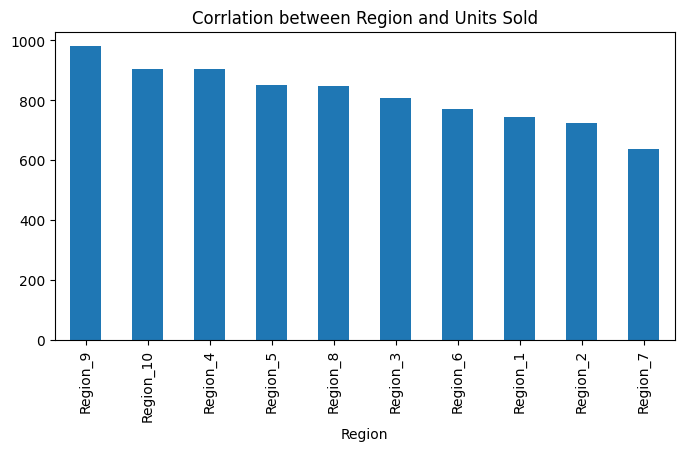

In [176]:
plt.figure(figsize=(8,4))
Corrlation_between_Region_and_Units_Sold=df.groupby('Region')[('Units Sold')].sum().sort_values(ascending=False)
Corrlation_between_Region_and_Units_Sold.plot(kind='bar')
plt.x=('Region')
plt.y=('Units Sold')
plt.title('Corrlation between Region and Units Sold')
plt.show()

In [193]:
# highest price for each Region
df.groupby('Region')['Price'].sum().sort_values(ascending=False)

Region
Region_9     10405.548198
Region_8     10185.675195
Region_4      9749.042191
Region_2      9101.546396
Region_10     8707.875795
Region_5      8313.364594
Region_3      7680.322792
Region_1      7334.604594
Region_6      6875.603993
Region_7      5892.405195
Name: Price, dtype: float64

Region_9 has highest sum price, highest units sold but 2nd sales revenue.
region_8 has 2nd high sum price, highest revenue with medium sales volumn.

two region with highest price demonstarte the highes sales volumn.

In [215]:
df

,Product,Region,Price,Units Sold,Sale Date,Total Sales
2,Product_46,Region_3,20.43,12.000000,2022-01-03,245.16000
3,Product_36,Region_1,12.77,10.000000,2022-01-04,127.70000
4,Product_17,Region_6,125.69,6.000000,2022-01-05,754.14000
5,Product_45,Region_1,8.63,11.000000,2022-01-06,94.93000
6,Product_31,Region_3,23.73,6.000000,2022-01-07,142.38000
...,...,...,...,...,...,...
988,Product_42,Region_9,240.97,10.073415,2024-09-15,2427.39079
993,Product_7,Region_9,128.51,17.000000,2024-09-20,2184.67000
994,Product_1,Region_4,95.24,7.000000,2024-09-21,666.68000
998,Product_2,Region_10,43.44,15.000000,2024-09-25,651.60000


a final check to see the df remain same.

Conclusion
[From product perspective]
Higest Units Sold: Product_3 
Highest Total Revenue: Product_31
Lowest Total Revnue: Product_3
Highest Sum Price: Product_31
Lowest Sum Price: Product_3

Based on the data that I organized above. We can tell that the product_3 with the highest sales volume doesn't gain the highest revenue among all the products. However, the Product_31 has the highest total revenue. Meanwhile,the Units sold of Product_31 ranked only 6th in the bar chart.Also, based on the first lmplot,we can see the relationship between price and Units sold is not obvious. The line shows slightly downward when the price is over 400$. Thus, the increase of the price won't have a significant impact on the units sold.
According to the other two lmplot. As the number of units sold increase, the total sales shows a steady upward trend. When the price increase, the total sales tend to increase significantly.
To conclude, the revenue gain through higher price is more than the cheaper product with high sales volume.

[From Regions perspective]
Highest units sold: Region_9
Highest Price: Region_9
2nd Sales Revenue: Region_9
Highesr Sales Revenue: Region_8(units sold ranked medium, 2nd high price)
Lowest Price: Region_7
Lowest units sold: Region_7
Lowest Sales Revenue: Region_7
Region_8 and Region_9 demonstarte the highest sum price and sales revenue. the difference bettwen them is not obvious. Region_7 shows the worset performance, the lowest price driven to the lowest sales revenue. it seems like the consumer in Rregion_7 do not prefer to pay for cheap product. 
From my perspective, higher price is still somehow a factor leading to high sales revenue. Even though the sales volume may be lower, the higher price per unit can compensate for the lower sales volume, leading to higher total revenue. Also, it is necessary to know the consumer behaviour in different region to create various strategy.

【Specific Recommendations】& 【Recommendation Summary】

# Specific
1:
【Product_3】 has the highest units sold but the lowest sum price and lowest total revenue. This indicates that there is high demand for this product, but its price setting may be too low, which resulting in lower revenue. Look at the specific data relates to Product_3, we can see it's price in different region has huge difference. The sum price of it in Region_6 is only 0.54. However,it performed well in Region 2. 
To conclude, based on the dataset, company may consider focus selling Product_3 in Region 2. Meanwhile，consider analyzing the market and competition to determine if a price adjustment is needed to optimize revenue without compromising sales volume.

2: 
【Product_31】 has the highest total revenue and the highest sum price. This indicates that it is a high-value product generating significant revenue. 
Focus on leveraging the success of this product and identifying factors that contribute to its popularity to potentially replicate the success with other products. Meanwhile, the strategy should consider based on the region as well.

3:
【Region_9】 has the highest units sold, highest price, but second-highest sales revenue. This region seems to have a strong market demand and willingness to pay higher prices.  
Company should consider to allocate more resources and marketing efforts to target and expand the customer base in this region.

4: 
【Region_8】Region_8 has the highest sales revenue despite not having the highest units sold. This indicates that the products sold in Region_8 have a higher price point, resulting in substantial revenue per sale. 
Company can try to analyze the customer base and preferences in Region_8 to understand the factors lead in higher sales revenue. 

5:
【Region_7】has the lowest sum price, lowest units sold, and lowest sales revenue. 
Company may consider adjusting the pricing strategy, exploring promotional activities, or enhancing the product offering to increase sales volume and revenue. 

# Recommendation Summary

To generate more revenue, i will suggest this e-commerce company set up the price little bit higher while the quality remain same.Since the finding indicates the price and units sold does not correlated significantly. Most of the consumer are more willing to pay with the medium high price. 

To capitalize on this trend, the company should implement different strategies tailored to each region. It is crucial to continuously analyze sales data, customer feedback, and market trends to understand customer preferences, and identify areas for improvement. Well analyzing sales data will enable the company to make better decisions regarding product development, pricing strategies, and regional approaches.





Cleaning Steps are described within the code above.
